# Curve fitting

We stop for the moment the physics related stuff and have a look at a different important topic, which is curve fitting. We demonstrate the least-square fitting of a quadratic function with three parameters to experimental data. You may of course also have more complex function or even a simple linear function. For some fitting functions you may write down explicit estimators of the parameters and you do not have to stress the fitting procedure. So before you fit, think about how to obtain a good estimate of your model parameters. For those of you, who are interested a bit more in that topic, have a look at maximum likelihood estimation for example. 

In [156]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size': 18})
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Idea

The result of an experiment are data points from which you would like to understand the physics behind, meaning you would like to see if a mathematical model fits your data.




So the data comes as a series of points, usually pairs of points such as

|x-data|y-data|
|-|-|
|$x_{1}$|$y_{1}$|
|$x_{2}$|$y_{2}$|
|$x_{3}$|$y_{3}$|
|....|...|
|$x_{N}$|$y_{N}$|




Here, each of the point $\lbrace x_{1},y_{1} \rbrace$ could be the result of a series of independent measurements, i.e. $y_{1,i}$ as well. The independent measurements yield a mean values

\begin{equation}
y_{1}=\frac{1}{N}\sum_i^N y_{1,i}
\end{equation}




If these measurements have been carried out with an uncertainty $\sigma$ for the individual measurements, then the sum of all measurements $\sum_{i}=y_{1,i}$ has a variance of $N\sigma^2$ and a standard deviation of $\sqrt{N}\sigma$. The mean value is therefore connected to an error (standard deviation) of 

\begin{equation}
\sigma_{SEOM}=\frac{\sigma}{\sqrt{N}}
\end{equation}

This is the standard error of the mean (SEOM) and it has importance across all measurements in physics. 
For later, note that the variance is defined by

\begin{equation}
\sigma^{2}_{1}= \frac{1}{N} \sum_{i=1}^{N} ( y_{1,i}-y_{1} )^2
\end{equation}

## Least squares

If we would now like to describe our data with a model function, which delivers a function value $f(x_{i},a)$ for a set of parameters $a$ at the position $x_{i}$, the the Gaussian uncertainty dictates a probability 

\begin{equation}
p_{y_{i}}=\frac{1}{\sqrt{2\pi}\sigma_{i}}\exp(-(y_{i}-f(x_{i},a))^2/2\sigma_{i}^2)
\end{equation}

of finding a data value $y_{i}$.
Note that I generalized here the uncertainty, which is now valid for the each point individually. 


If you now want to know how close a set of $N$ data points is to a set of function values, you have to multiply the individual probabilities:

\begin{equation}
p(y_{1},\ldots,y_{N})=\prod_{i}^{N}\frac{1}{\sqrt{2\pi}\sigma_{i}}\exp(-(y_{i}-f(x_{i},a))^2/2\sigma_{i}^2)
\end{equation}

If this joint probability is maximum, you will have the closest match of the function values to the data. 

Applying the logarithm to both side  of the equation results in

\begin{equation}
\ln(p(y_{1},\ldots,y_{N}))=-\frac{1}{2}\sum_{i=1}^{N}\left ( \frac{y_{i}-f(x_{i},a)}{\sigma_{i}}\right )^2 - \sum_{i=1}^{N}\ln\left ( \sigma_{i}\sqrt{2\pi}\right)
\end{equation}

The first term on the right side (except the factor 1/2) is the least squared deviation 

\begin{equation}
\chi^{2}=\sum_{i=1}^{N}\left ( \frac{y_{i}-f(x_{i},a)}{\sigma_{i}}\right )^2
\end{equation}

The second term is just a constant value given by the uncertainties of our experimental data.

## Data

Lets have a look at the meaning of this equation. Lets assume we measure the trajectory of a ball that has been thrown under and angle $\alpha$ with an initial velocity $v_{0}$. We have collected data point by measuring the height of the ball above ground at equally spaced distances from the throwing person. Lets load some data




In [512]:
# Here is some data of the height measurements including untertainties
x_data,y_data,err=np.loadtxt('data.txt',unpack=True)

We can plot the data and expect, of course, parabola. Therefore we model our experimental data with a parabola like

\begin{equation}
y=ax^2+bx+c
\end{equation}

where the parameter $a$ must be negative since the parabola is inverted. 

I have created an interactive plotting with an interact widget, as this allows you to play around with the parameters. The value of $\chi^2$ is also included in the legend, that you get an impression of how good your fit of the data is.

In [513]:
def parabola(x,a,b,c):
    return(a*x**2+b*x+c)

def plot(a,b,c): 
    y=parabola(x,a,b,c)
    plt.figure(figsize=(8,6))
    chisq=(((y_data-parabola(x_data,a,b,c))/err)**2).sum()
    plt.plot(x,y,label='$\chi^2$={0:6.3f}'.format(chisq))
    plt.errorbar(x_data,y_data,yerr=err,marker='o',fmt="none",color='k')
    
    plt.scatter(x_data,y_data,marker='o',color='k')    
    plt.legend()
    plt.xlabel('x- position')
    plt.ylabel('y- position')
    plt.show()

In [509]:
x=np.linspace(0,1,100)
interact(plot,a=-1.7,b=1.3,c=1.0);

interactive(children=(FloatSlider(value=-1.7, description='a', max=1.7, min=-5.1), FloatSlider(value=1.3, desc…

We have that troubeling point at the right edge with a large uncertainty. However, since the value of $\chi^2$ divides the deviation by the uncertainty $\sigma_{i}$ the weight for this point overall in the $\chi^{2}$ is smaller than for the other points.

\begin{equation}
\chi^{2}=\sum_{i=1}^{N}\left ( \frac{y_{i}-f(x_{i},a)}{\sigma_{i}}\right )^2
\end{equation}

You may simply check the effect by changing the uncertainty of the last data points in the error array.

## Least square fitting

The best fit of the model to the experimental data is then obtained by minimizing the least squares, i.e. 

\begin{equation}
\frac{d\chi^{2}}{da}=\sum_{i=1}^{N}\frac{1}{\sigma_{i}^2}\frac{df(x_{i},a)}{da}[y_{i}-f(x_{i},a)]=0
\end{equation}

This kind of least squares minimization is done by a fitting software with different types of algorithms. 

OK so let's do some fitting. We will use the `SciPy` module for fitting. There we have a `curve_fit` method in the `optimize` sub-module.
At first we should provide a model function we would like to fit to the data. This could just be our parabola function.

In [514]:
def parabola(x,a,b,c):
    return(a*x**2+b*x+c)

At second, we should not leave the fitting procedure of `SciPy` without a clue on where to look for the optimal parameters. Therefore we can provide initial parameters for the search.

In [515]:
init_guess =[-1,1,1]

The fit is then obtained by calling

In [516]:
fit=curve_fit(parabola,x_data,y_data,sigma=err,p0=init_guess,absolute_sigma=True)

and we obtain all the fit results in the variable `fit`. This is actually composed of various results. If we split that up, we will find 

In [517]:
ans,cov=fit
fit_a,fit_b,fit_c=ans

`ans` containing the fit parameters `fit_a`,`fit_b`,`fit_c` as well as the so-called covariance matrix `cov`. Lets have a look at the fit and the $\chi^{2}$ value first.

In [518]:
fit_a,fit_b,fit_c

(-2.518360505820918, 1.6971754996789874, 1.0067886882158636)

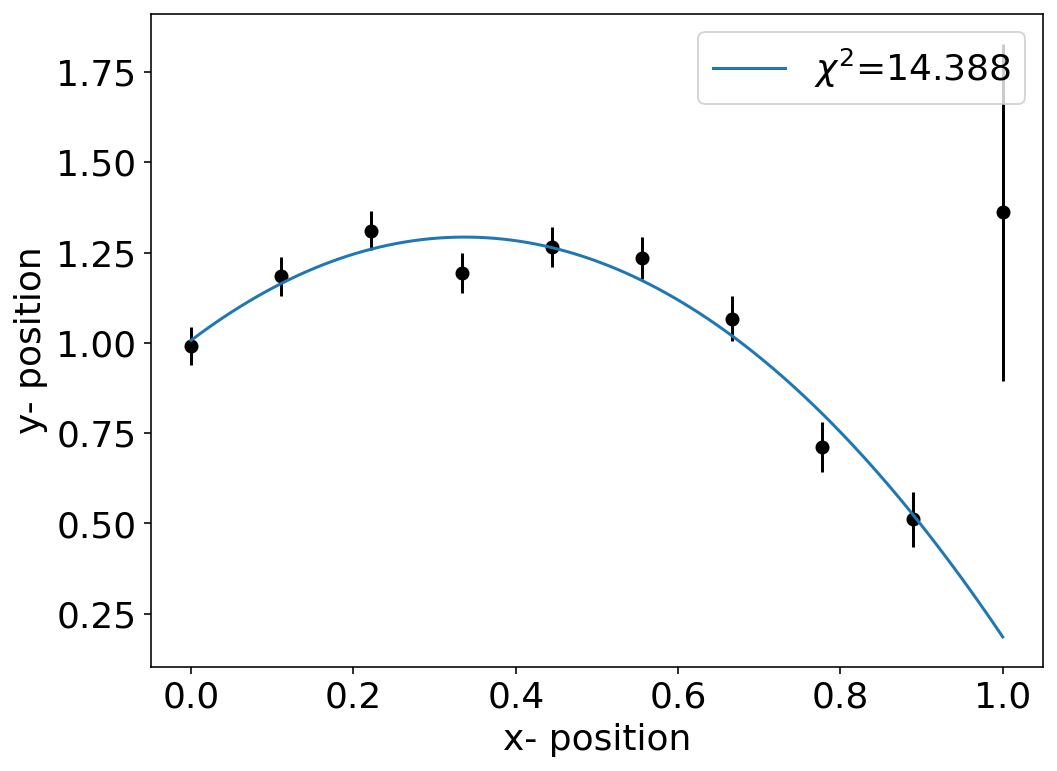

In [519]:
plt.figure(figsize=(8,6))
chisq=(((y_data-parabola(x_data,fit_a,fit_b,fit_c))/err)**2).sum()
plt.plot(x,parabola(x,fit_a,fit_b,fit_c),label='$\chi^2$={0:6.3f}'.format(chisq))
plt.errorbar(x_data,y_data,yerr=err,marker='o',fmt="none",color='k',)
plt.scatter(x_data,y_data,marker='o',color='k') 
plt.xlabel('x- position')
plt.ylabel('y- position')
plt.legend()
plt.show()

### $\chi$-squared value

The value of $\chi^2$ gives you a measure for the quality of the fit. We may judge the quality by calculating and expression of the expectation value of $\chi^{2}$

\begin{equation}
\langle \chi^{2}\rangle =\sum_{i=1}^{N} \frac{\langle (y_{i}-f(x_{i},a) )^2\rangle }{\sigma_{i}^2}=\sum_{i=1}^{N} \frac{\sigma_{i}^2}{\sigma_{i}^2}=N
\end{equation}


So the mean of the least squared deviation increases with the number of datapoints and thus

* $\chi^{2}>>N$ means that the fit is bad
* $\chi^{2}<N$ means that the uncertainties are wrong

The first may occur if you don't have a good fit to your data, for example, a wrong model. The second typically occurs if you don't have estimates of the uncertainties and you assume all uncertainties to be constant. So it is really important to have a good estimate of the uncertainties and to include it in do you fit. If you  include the uncertainties your fit it is called a `weighted fit` in case you don't include the uncertainties (meaning you keep them constant) it is called an `unweighted fit`.

For our fit above we obtain a  $\chi^{2}$ which is on the order of $N=10$, which tells you that I have cheated well when creating the data. 

### Residuals

A similar view on the quality of the fit may be ontained from the residuals. These are defined as the deviation of the data from the model for the best fit. 

\begin{equation}
r_i=y_i-f(x_{i},a)
\end{equation}

The residuals may also be given as the percentage of the deviation of the data from the fit by

\begin{equation}
r_i=100\left (\frac{y_i-f(x_{i},a)}{y_i}\right )
\end{equation}

If there are only statsitical fluctuations of the residuals around zero, then the fit and likely also the model is good.

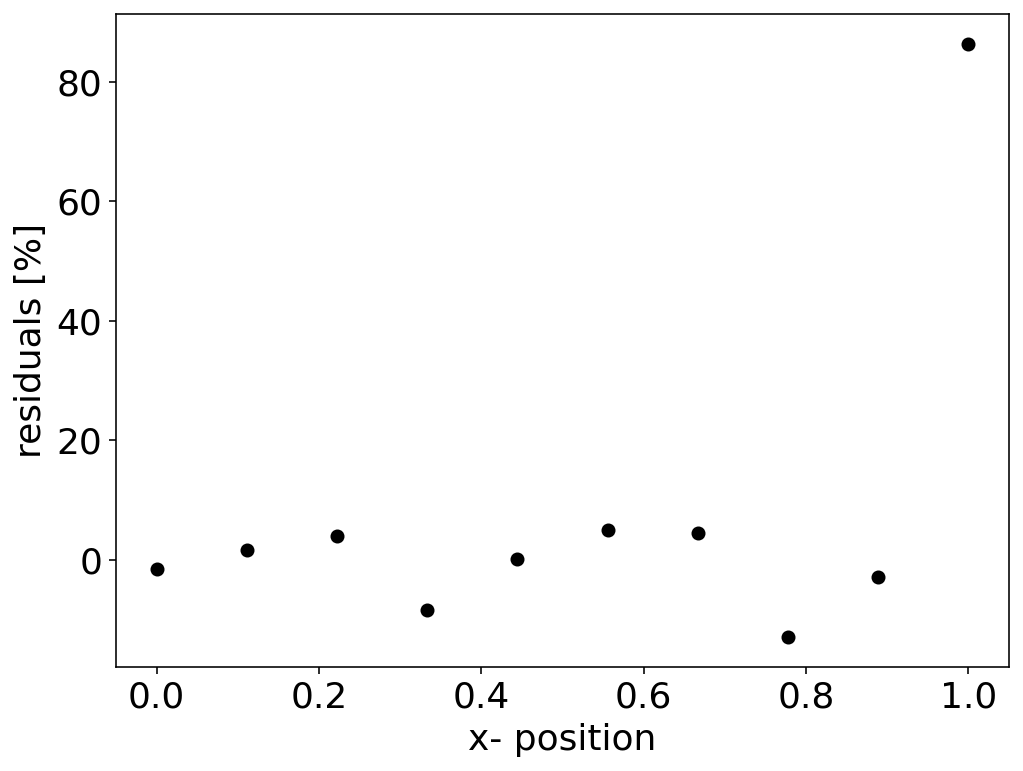

In [505]:
plt.figure(figsize=(8,6))
chisq=(((y_data-parabola(x_data,fit_a,fit_b,fit_c))/err)**2).sum()
plt.scatter(x_data,100*(y_data-parabola(x_data,fit_a,fit_b,fit_c))/y_data,marker='o',color='k') 
plt.xlabel('x- position')
plt.ylabel('residuals [%]')
plt.show()

## Covariance matrix

Let us now have a look at the individual measurements which have yielded the errorbars in the above plot. If I take each of those measurements and calculate a fit for each of the datasets I get a whole set of fit functions and parameters. The uncertainties in the parameters of the fit function are the result of the measurement uncertainty. 

In [535]:
def data(x,a,b,c):
    y=a*x**2+b*x+c
    err=[np.random.normal() for _ in range(len(x))]
    err=y*err*0.05
    return(y+err)

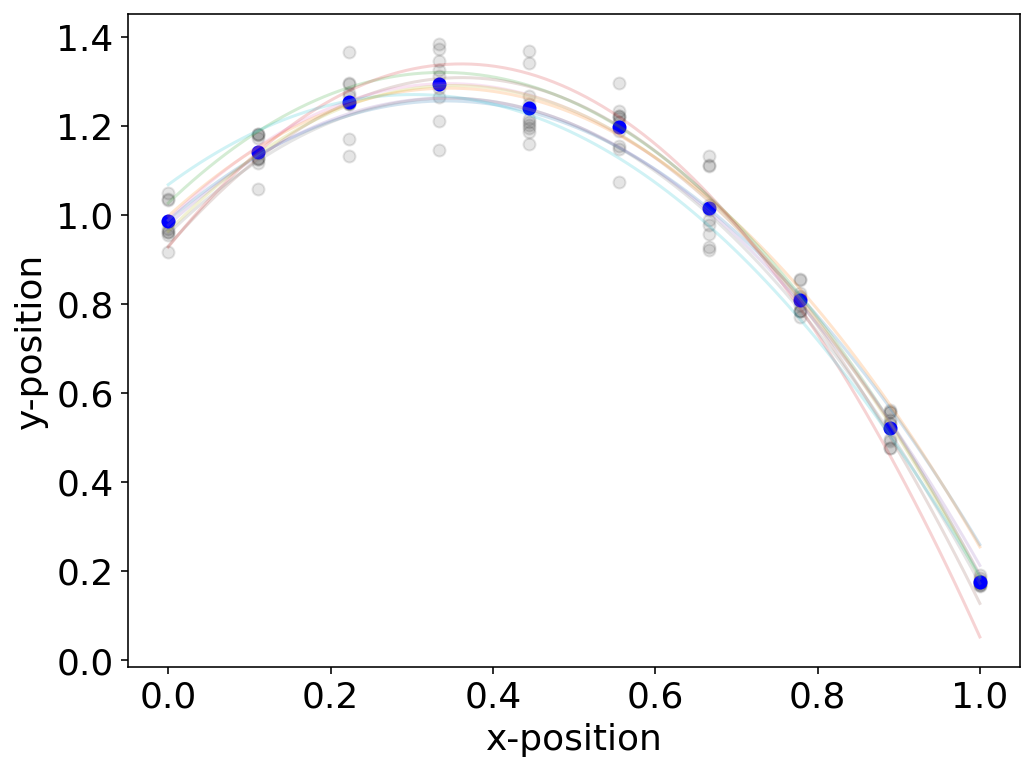

In [522]:
x=np.linspace(0,1,10)
ym=np.zeros(10)
plt.figure(figsize=(8,6))

for _ in range(10):    
    y=data(x,-2.52,1.6971755,1)
    ym=ym+y
    p,cov=curve_fit(parabola,x,y,sigma=err,p0=init_guess,absolute_sigma=True)
    plt.scatter(x,y,color='k',alpha=0.1)
    xf=np.linspace(0,1,100) 
    plt.plot(xf,parabola(xf,p[0],p[1],p[2]),alpha=0.2)
    
plt.scatter(x,ym/10,color='b')    
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.show()    

We may therefore want to characterize how much the individual parameters vary with each other. In other word, this means that we want to know whether the fit parameters are independent or not, which is a good quality measure of our model. For this pupose we use a generalization of the variance definition

\begin{equation}
\sigma^{2}=\frac{1}{N}\sum_{i=1}^{N}(y_{i}-<y>)^2
\end{equation}
    
which is the mean squared deviation of the individual values from its mean. This equation is a special case of a the so-called covariance
    
\begin{equation}
{\rm cov(x,y)}=\frac{1}{N}\sum_{i=1}^{N}(x_{i}-<x>)(y_{i}-<y>)
\end{equation}
    
which measures by how much a variation from of $x_{i}$ from the mean is also connected to a variation of $y_{i}$ from the mean. The variance itself, is therefore just ${\rm cov}(x,x)$.

The `curve_fit` function delivers a covariance matrix as mentioned above. This covariance matrix is, however, not a measure of how the data varies among each other but rather a measure of how much the individual fit parameters varying with each other. If we fit our data with a model containing three parameters $(a,b,c)$, then the covariance matrix of the parameters $p_{i}$ and $p_{j}$ with $i={a,b,c}$ and $j={a,b,c}$ is a $3\times 3$ matrix. 

\begin{equation}
{\rm cov}(p_{i},p_{j})=
\begin{bmatrix}
 \sigma_{aa}^{2} &  \sigma_{ab}^{2} & \sigma_{ac}^{2} \\
 \sigma_{ba}^{2} &  \sigma_{bb}^{2} & \sigma_{bc}^{2} \\
 \sigma_{ca}^{2} &  \sigma_{cb}^{2} & \sigma_{cc}^{2}
\end{bmatrix}
\end{equation}

The diagonal elements thereby provide the squared errors of the fit parameters (their variances). The off diagonal elements describe by how much the individual parameters are related with each other. 

In [537]:
print(cov)

[[ 0.07675961 -0.00252389 -0.00524745]
 [-0.00252389  0.0002834   0.0001206 ]
 [-0.00524745  0.0001206   0.00074961]]


The matrix above is our covariance matrix of the parameters. You see from the off diagonal elements that a number of parameters is highly related to each other. An even better view may be obtained by the so called correlation matrix $R$, where the matrix elements

\begin{equation}
R_{p_{i},p_{j}}=\frac{{\rm cov}(p_{i},p_{j})}{\sqrt{\sigma_{i}^2\sigma_{j}^2}}
\end{equation}

The entries of the covariance matrix are here normalized by the variances of the parameters itself, i.e. by the diagonal elements.

In [538]:
s=np.diag(cov)
R=np.zeros([3,3])
for i in range(3):
    for j in range(3):
        R[i,j]=cov[i,j]/np.sqrt(s[i]*s[j])

In [527]:
print(R)

[[ 1.         -0.95608434  0.63731452]
 [-0.95608434  1.         -0.79422754]
 [ 0.63731452 -0.79422754  1.        ]]


The correlation matrix thus indeed reveal that the parameters are highly related to each other. `curve_fit` calculates the corresponding covariance entries using the specified uncertainties. We may access the meaning of them a bit better if we look at our synthetic data. 

In [539]:
def data(x,a,b,c):
    y=a*x**2+b*x+c
    err=[np.random.normal() for _ in range(len(x))]
    err=y*err*0.05
    return(y+err)

If we generate 100 different measurements and fit the accordingly, we can access a possible correlation of the parameters as sugested by the correlation matrix.

In [540]:
a=[]
b=[]
c=[]
x=np.linspace(0,1,10)
for _ in range(100):    
    y=data(x,-2.52,1.6971755,1)
    p,cov=curve_fit(parabola,x,y,sigma=err,p0=init_guess,absolute_sigma=True)
    a.append(p[0])
    b.append(p[1])
    c.append(p[2])

If we now plot the parameter $a$ over the parameter $b$, we indeed obtain a very strong correlation, which has e negative slope as suggested by the correlation matrix.

Text(0, 0.5, 'parameter b')

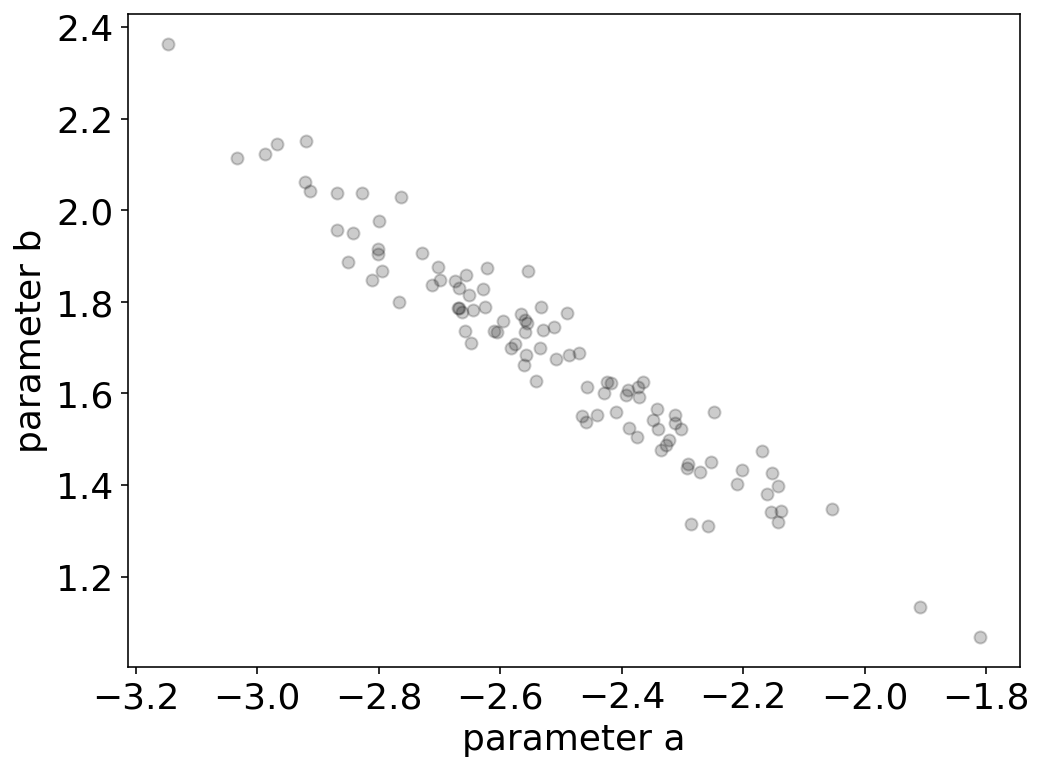

In [529]:
plt.figure(figsize=(8,6))
plt.scatter(a,b,color=' ',alpha=0.2)
plt.xlabel('parameter a')
plt.ylabel('parameter b')

This correlation of parameters means, that the parameter `b` is not independent from `a` but rather strongly linearly dependent on it.
We might want to find a better model containing more independent parameters. We may write down a different model

\begin{equation}
y=a(x-b)^2 +c
\end{equation}

which also contains three parameters, but the parameter `b` directly refers to trhe maximum of out parabola, while the parameter `a` denotes its curvature.

In [541]:
def newmodel(x,a,b,c):
    return(a*(x-b)**2+c)

In [542]:
fit=curve_fit(newmodel,x_data,y_data,sigma=err,p0=init_guess,absolute_sigma=True)

In [543]:
ans, cov=fit

In [544]:
s=np.diag(cov)
R=np.zeros([3,3])
for i in range(3):
    for j in range(3):
        R[i,j]=cov[i,j]/np.sqrt(s[i]*s[j])

We see from the covariance matrix that the new model has a smaller correlation of the parameters on each other. 

In [546]:
print(cov)

[[ 0.07675961 -0.00252389 -0.00524745]
 [-0.00252389  0.0002834   0.0001206 ]
 [-0.00524745  0.0001206   0.00074961]]


This is also expressed by our correlation matrix.

In [495]:
print(R)

[[ 1.         -0.54113427 -0.69177302]
 [-0.54113427  1.          0.26166299]
 [-0.69177302  0.26166299  1.        ]]
